# 人工知能のための数学最終レポート

*M21W0B09*

***
## コンセプト
自宅の家賃が妥当なのかどうか調査するため、最寄り駅の賃貸物件の家賃から学習モデルを作成。<br>
散布図と線形回帰のプロットに自宅を被せて表示するプログラムを作成。<br>
基本的には「人工知能のための数学」の講義内で教授された記法を使う。

***
## 仮説
立地や物件の状態を鑑みる限りでは割安であると予想している。

In [38]:
import numpy as np
import matplotlib.pyplot as plt


#### 賃貸住宅の基礎データ
※横軸 = (駅徒歩 / 2) + 築年数<br>

In [39]:
def generatePredictModel():
    with open('house_price.csv', 'r') as fd:
        feature_names = np.array(fd.read().split('\n')[0].split(','))

    csv_data = np.loadtxt('house_price.csv', delimiter=',', skiprows=1)

    learning_data = csv_data[:, np.logical_or(feature_names == 'FarFromStation', feature_names == 'Age')]
    learning_data = np.array([i[0] / 2 + i[1] for i in learning_data])

    true_data = csv_data[:, feature_names == 'TotalPrice']
    true_data = np.array([i[0] for i in true_data])

    return learning_data, true_data

In [40]:
# 駅徒歩 + 築年数　と　家賃を返してもらう
x1, yt = generatePredictModel()

x_mean = np.mean(x1)
x_std = np.std(x1)

x3 = (x1 - x_mean) / x_std

In [41]:
x_org = np.reshape(x3, (-1,1))
x = np.insert(x_org, 0, 1.0, axis=1)
print(x[:10])

[[ 1.          2.02520744]
 [ 1.         -0.46561887]
 [ 1.         -1.43427354]
 [ 1.         -2.05698012]
 [ 1.         -0.67318773]
 [ 1.         -1.08832545]
 [ 1.         -0.67318773]
 [ 1.         -0.18886039]
 [ 1.          0.71060466]
 [ 1.         -0.05048115]]


#### 予測関数predの定義

In [42]:
# 予測関数 (1, x)の値から予測値ypを計算する
def pred(x, w):
    return(x @ w)


In [43]:
# 初期化処理

# データ系列総数
# 次の行を正しく実装します
M  = x.shape[0]

# 入力データ次元数(ダミー変数を含む)
# 次の行を正しく実装します
D = x.shape[1]

# 繰り返し回数
iters = 10000

# 学習率
alpha = 0.01

In [44]:
# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [45]:

# 繰り返しループ

for k in range(iters+1):

    # 予測値の計算 (7.8.1)
    yp = pred(x, w)

    # 誤差の計算 (7.8.2)
    yd = yp - yt

    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x.T @ yd) / M

    # 学習曲線描画用データの計算、保存
    if k % 2000 == 0:
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss), w)


iter = 0  loss = 24.942279 [1.06748786 0.98257643]
iter = 2000  loss = 0.651322 [ 7.74878551 -0.74235726]
iter = 4000  loss = 0.651322 [ 7.74878552 -0.74235726]
iter = 6000  loss = 0.651322 [ 7.74878552 -0.74235726]
iter = 8000  loss = 0.651322 [ 7.74878552 -0.74235726]
iter = 10000  loss = 0.651322 [ 7.74878552 -0.74235726]


In [46]:
# 予測値、正解値、誤差の表示(最初の10要素)

print('予測値:', yp[:10])
print('実測値', yt[:10])
print('誤差', yd[:10])


予測値: [6.24535807 8.09444107 8.8135289  9.27579965 8.24853132 8.55671182
 8.24853132 7.8889874  7.22126299 7.78626057]
実測値 [8.8  8.7  7.6  7.7  8.   9.85 7.3  6.8  8.2  7.5 ]
誤差 [-2.55464193 -0.60555893  1.2135289   1.57579965  0.24853132 -1.29328818
  0.94853132  1.0889874  -0.97873701  0.28626057]


#### 散布図と回帰直線の同時表示

In [47]:
# 回帰直線描画用の座標値計算

# xの最小値、最大値の座標を計算
xl = np.array([[1, x3.min()],[1, x3.max()]])

# 対応するyの予測値を計算
yl = pred(xl, w)

# 結果確認
print(xl)
print(yl)

[[ 1.         -4.06347909]
 [ 1.          3.40899983]]
[10.76533873  5.21808974]


#### 我が家の値を正規化

In [48]:
# 我が家の値生成
my_home_x = ((13.0 / 2.0) + 29.0 - x_mean) / x_std
my_home_y = 8.3


#### プロット表示

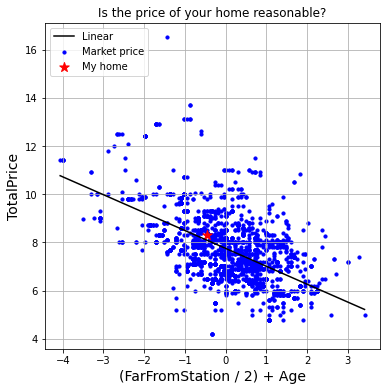

In [60]:
plt.figure(figsize=(6,6))
plt.scatter(x3, yt, s=10, c='b')
plt.scatter(my_home_x, my_home_y, s=100, c='r', marker="*")
plt.xlabel('(FarFromStation / 2) + Age', fontsize=14)
plt.ylabel('TotalPrice', fontsize=14)
plt.plot(xl[:,1], yl, c='k')
plt.grid(True)
plt.title('Is the price of your home reasonable?')
plt.legend(("Linear","Market price","My home"),loc="upper left")

plt.show()

#### 横軸について
駅徒歩と築年数を単純に足すだけだとinputとしては確実に誤っていると思われる。<br>
例えば、駅徒歩50分の新築物件のような場合、新築であるというのがウリなので駅徒歩が家賃の現象に影響することは無いと予想される。<br>
そこで、定量的に家賃に影響する築年数はいじらず、駅徒歩を半分にして異常値の丸め込みを行った。

### 結果
回帰直線よりも上に位置しているため、このエリア内では多少割高な家賃であると言える。<br>
築年数や駅徒歩を加味すると多少割安な印象があったのだが、個人的にはややがっかりな結果となった。<br>
今後転居する際などはこのアプリを用いて試算するのも1つ良いかもしれない。